In [1]:
from tensorflow import keras
model = keras.models.load_model('My_Model')

In [ ]:
# This version works, its in the right order and it seems to create an accurate model.

In [2]:
model

In [3]:
import tensorflow as tf
training_data_path = "./train"
test_data_path = "./test"
SEED = 42
image_size = (256,256)
color_mode='rgb'
number_colour_layers = 3
image_shape = image_size + (number_colour_layers,)


def get_image_data(data_path, color_mode, image_size, seed = None, subset = None, validation_split = None):
    if subset:
        validation_split = 0.2
    raw_data_set = \
    tf.keras.preprocessing.image_dataset_from_directory(
        data_path,
        color_mode=color_mode,
        image_size=image_size,
        seed=seed,
        validation_split=validation_split, 
        subset=subset
    )
    
    raw_data_set.class_names.sort()
    
    return {
        "data": raw_data_set.cache().prefetch(
        buffer_size = tf.data.experimental.AUTOTUNE
        ),
        "classNames": raw_data_set.class_names
    }


training_ds = get_image_data(
    training_data_path,
    color_mode,
    image_size,
    SEED,
    subset = "training"
)
validation_ds = get_image_data(
    training_data_path,
    color_mode,
    image_size,
    SEED,
    subset = "validation"
)
test_ds = get_image_data(
    test_data_path,
    color_mode,
    image_size
)


equivalence_check = training_ds["classNames"] == validation_ds["classNames"]
assert_fail_message = "Training and Validation classes should match"
assert(equivalence_check), assert_fail_message
class_names = training_ds["classNames"]
number_classes = len(class_names)

Found 16000 files belonging to 2 classes.
Using 12800 files for training.
Found 16000 files belonging to 2 classes.
Using 3200 files for validation.
Found 5476 files belonging to 2 classes.


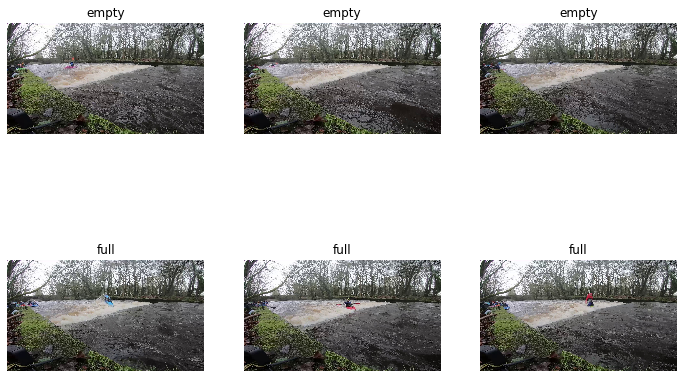

In [5]:
from os import listdir
from os.path import join
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
image_indexes = [286, 723, 1103]
selected_image_file_paths = dict()
for classification in class_names:
    image_directory = join(training_data_path, classification)
    image_file_names = listdir(image_directory)
    selected_image_file_paths[classification] = [join(image_directory, image_file_names[i]) for i in image_indexes]
plt.figure(figsize=(12, 8))
    
for i,classification in enumerate(class_names):
    for j,image in enumerate(selected_image_file_paths[classification]):
        image_number = (i * len(image_indexes)) + j + 1
        ax = plt.subplot(number_classes,3,image_number)
        plt.title(classification)
        plt.axis("off")
        plt.imshow(mpimg.imread(image))

In [6]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
history = model.fit(
    training_ds["data"],
    validation_data = validation_ds["data"],
    epochs = 20,
    callbacks = [callback]
)

Epoch 1/20
400/400 [==============================] - 994s 2s/step - loss: 0.9095 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 2/20
400/400 [==============================] - 527s 1s/step - loss: 0.6928 - accuracy: 0.5079 - val_loss: 0.6908 - val_accuracy: 0.6853
Epoch 3/20
400/400 [==============================] - 933s 2s/step - loss: 0.3137 - accuracy: 0.8430 - val_loss: 0.0179 - val_accuracy: 0.9959
Epoch 4/20
400/400 [==============================] - 583s 1s/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/20
400/400 [==============================] - 575s 1s/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 8.5802e-04 - val_accuracy: 1.0000
Epoch 6/20
400/400 [==============================] - 617s 2s/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 5.1013e-04 - val_accuracy: 1.0000
Epoch 7/20
400/400 [==============================] - 612s 2s/step - loss: 3.2428e-04 - accuracy: 1.0000 - val_loss: 2.5471e-04 - val_

In [7]:
model.save('model_22_01_11_notts_tuam')


INFO:tensorflow:Assets written to: model_22_01_11_notts_tuam\assets
